# Business Case: Netflix - Data Exploration and Visualisation

## Importing all the `libs`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
data_set = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'

In [3]:
df = pd.read_csv(data_set)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Exploring the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [7]:
(
    df.isnull().sum() / df.shape[0]
) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [8]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [9]:
df['type'].value_counts(normalize=True) * 100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [10]:
df['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

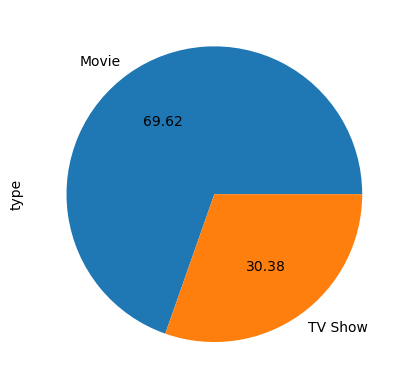

In [11]:
df['type'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f');

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Unnesting the data for few of the cols (`cast`, `director`, `country`, `listed_in`)

In [24]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


#### I. Unnesting `Cast`

In [22]:
df_1 = df.loc[:,'cast'].apply(lambda x: str(x).split(', ')).tolist()
df_1 = pd.DataFrame(df_1, index=df.title).stack().reset_index()
df_1 = df_1.loc[:, ['title', 0]]
df_1 = df_1.rename(columns={0: "cast"})

In [23]:
df_1

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


#### II. Unnesting `Directors`

In [27]:
df_2 = df.loc[:,'director'].apply(lambda x: str(x).split(', ')).tolist()
df_2 = pd.DataFrame(df_2, index=df.title).stack().reset_index()
df_2 = df_2.loc[:, ['title', 0]]
df_2 = df_2.rename(columns={0: "director"})

In [28]:
df_2

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


#### III. Unnesting `listed_in`

In [29]:
df_3 = df.loc[:,'listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_3 = pd.DataFrame(df_3, index=df.title).stack().reset_index()
df_3 = df_3.loc[:, ['title', 0]]
df_3 = df_3.rename(columns={0: "listed_in"})

In [30]:
df_3

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


#### IV. Unnesting `country`

In [31]:
df_4 = df.loc[:,'country'].apply(lambda x: str(x).split(', ')).tolist()
df_4 = pd.DataFrame(df_4, index=df.title).stack().reset_index()
df_4 = df_4.loc[:, ['title', 0]]
df_4 = df_4.rename(columns={0: "country"})

In [32]:
df_4

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


#### Merging all the data after unnesting

In [39]:
# Merting the 4 df, df_1 to df_4
df_5 = pd.merge(df_1, df_2, on='title', how='inner')
df_6 = pd.merge(df_5, df_3, on='title', how='inner')
df_7 = pd.merge(df_6, df_4, on='title', how='inner')

# Renaming the cols 
df_7.rename(
            columns={
                "cast": "Actors",
                "director" : "Director",
                "listed_in" : "Genre",
                "country" : "Country"
            }, inplace=True
)

# Replacing the NaN 
df_7['Actors'].replace('nan', 'Unknown Actor', inplace=True)
df_7['Director'].replace('nan', 'Unknown Director', inplace=True)
df_7['Country'].replace('nan', np.NaN, inplace=True)

In [40]:
df_7

,title,Actors,Director,Genre,Country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India
